### **import libraries**

In [ ]:
from google.colab import files
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### **file upload**

In [ ]:
uploaded = files.upload()

Saving Data_Pathrise.xlsx to Data_Pathrise.xlsx


### **read data frame**

In [ ]:
df=pd.read_excel('Data_Pathrise.xlsx')

### **Data cleaning**

In [ ]:
df['work_authorization_status'] = df['work_authorization_status'].replace('F1 Visa/OPT', 'OPT')
df['work_authorization_status'] = df['work_authorization_status'].replace('F1 Visa/CPT', 'CPT')

In [ ]:
df.dropna(subset=['cohort_tag'], inplace=True)

In [ ]:
df['start_work_month']=df['cohort_tag'].str[:3]

In [ ]:
df['start year']=df['cohort_tag'].str[-3:-1]

In [ ]:
df['Start year']='20' + df['start year']

In [ ]:
df['start_work_decade']=df['cohort_tag'].str[-1]
df=df[df['start_work_decade']!='a']

In [ ]:
df=df[df['pathrise_status']!='Active']
df=df[df['pathrise_status']!='MIA']
df=df[df['pathrise_status']!='Deferred']
df=df[df['pathrise_status']!='Break']

In [ ]:
df['highest_level_of_education'].replace('GED or equivalent','High School Graduate')

2         Master's Degree
3       Bachelor's Degree
4       Bachelor's Degree
5         Master's Degree
6         Master's Degree
              ...        
2535      Master's Degree
2538      Master's Degree
2539      Master's Degree
2540      Master's Degree
2543      Master's Degree
Name: highest_level_of_education, Length: 1886, dtype: object

In [ ]:
df['highest_level_of_education'].replace('Some College, No Degree','No Degree')

2         Master's Degree
3       Bachelor's Degree
4       Bachelor's Degree
5         Master's Degree
6         Master's Degree
              ...        
2535      Master's Degree
2538      Master's Degree
2539      Master's Degree
2540      Master's Degree
2543      Master's Degree
Name: highest_level_of_education, Length: 1886, dtype: object

In [ ]:
df['gender'].fillna('Decline to Self Identify', inplace=True)

In [ ]:
df['biggest_challenge_in_search'].fillna( 'Hearing back on my applications', inplace=True)

In [ ]:
df['professional_experience'].fillna('1-2 years ', inplace=True)

In [ ]:
df['work_authorization_status'].fillna('Citizen', inplace=True)

In [ ]:
df['length_of_job_search'].fillna("Less than one month", inplace=True)

In [ ]:
df['race'].fillna('Decline to Self Identify', inplace=True)

In [ ]:
df['employment_status '].fillna('Student', inplace=True)

In [ ]:
df['highest_level_of_education'].fillna("Bachelor's Degree", inplace=True)

In [ ]:
mean = df['number_of_interviews'].mean()
df['number_of_interviews'].fillna(mean, inplace=True)

In [ ]:
mapping = {
    'Less than one month': 'Short',
    '1-2 months': 'Short',
    '3-5 months': 'Long',
    '6 months to a year': 'Long',
    'Over a year': 'Long'
}

# Replace values in the 'length_of_job_search' column
df['length_of_job_search'] = df['length_of_job_search'].replace(mapping)
df['length_of_job_search'].value_counts()

Short    1264
Long      622
Name: length_of_job_search, dtype: int64

In [ ]:
columns_to_drop = ['number_of_applications', 'start year' ,'pathrise_status', 'cohort_tag','program_duration_days','id']
df = df.drop(columns=columns_to_drop)

In [ ]:
df.isna().sum()

primary_track                  0
placed                         0
employment_status              0
highest_level_of_education     0
length_of_job_search           0
biggest_challenge_in_search    0
professional_experience        0
work_authorization_status      0
number_of_interviews           0
gender                         0
race                           0
start_work_month               0
Start year                     0
start_work_decade              0
dtype: int64

In [ ]:
df.shape

(1886, 14)

### **EDA**

<Axes: xlabel='length_of_job_search', ylabel='count'>

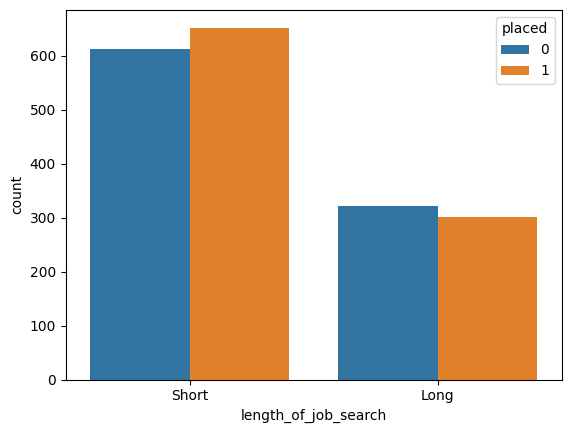

In [ ]:
sns.countplot(x='length_of_job_search', data=df, hue='placed')

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 [Text(0, 0, 'AUG'),
  Text(1, 0, 'SEP'),
  Text(2, 0, 'OCT'),
  Text(3, 0, 'NOV'),
  Text(4, 0, 'JAN'),
  Text(5, 0, 'DEC'),
  Text(6, 0, 'JUL'),
  Text(7, 0, 'MAR'),
  Text(8, 0, 'FEB'),
  Text(9, 0, 'APR'),
  Text(10, 0, 'JUN'),
  Text(11, 0, 'MAY')])

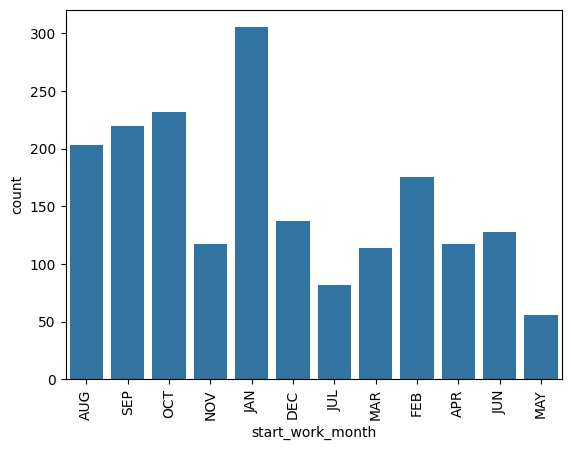

In [ ]:
sns.countplot(x='start_work_month',data= df)
plt.xticks(rotation=90)

([0, 1, 2, 3],
 [Text(0, 0, '2019'),
  Text(1, 0, '2020'),
  Text(2, 0, '2018'),
  Text(3, 0, '2021')])

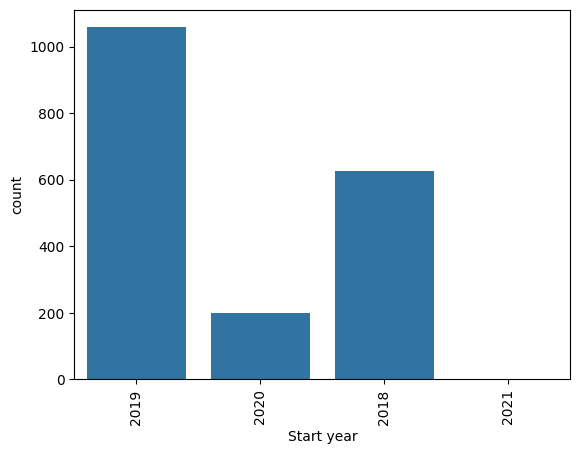

In [ ]:
sns.countplot(x='Start year',data= df)
plt.xticks(rotation=90)

<Axes: xlabel='placed', ylabel='count'>

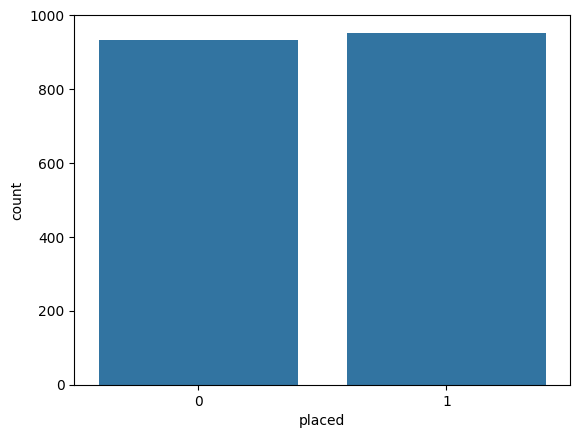

In [ ]:
sns.countplot(x='placed', data= df)

In [ ]:
cols=[ 'primary_track', 'employment_status ',
       'highest_level_of_education', 'length_of_job_search',
       'biggest_challenge_in_search', 'professional_experience',
       'work_authorization_status', 'gender', 'race']
dic_pivot={}
for col in cols:
    pivot_table1=pd.pivot_table(df[[col,'placed']],index='placed', columns=col, aggfunc='size')
    column_total=pivot_table1.sum()
    pivot_table2=pivot_table1.divide(column_total)*100
    pivot_table2.index=['Not placed %','Placed %']
    row_total=column_total.sum()
    population=column_total.divide(row_total)*100
    pivot_table2.loc['population %']=population
    dic_pivot[col]=pivot_table2
    ptivot_heat=pivot_table2.style.background_gradient(cmap ='viridis').format("{:.2f}")
    display(ptivot_heat)

primary_track,Data,Design,Marketing,PSO,SWE,Web
Not placed %,50.28,54.68,50.00,65.35,45.60,75.00
Placed %,49.72,45.32,50.00,34.65,54.40,25.00
population %,9.38,10.76,0.11,12.09,67.44,0.21


employment_status,Contractor,Employed Full-Time,Employed Part-Time,Student,Unemployed
Not placed %,59.40,51.38,46.97,48.11,48.57
Placed %,40.60,48.62,53.03,51.89,51.43
population %,7.05,17.23,10.50,39.24,25.98


highest_level_of_education,Bachelor's Degree,Doctorate or Professional Degree,GED or equivalent,High School Graduate,Master's Degree,"Some College, No Degree",Some High School
Not placed %,48.76,39.80,64.29,16.67,52.01,50.50,69.23
Placed %,51.24,60.20,35.71,83.33,47.99,49.50,30.77
population %,55.78,5.20,0.74,0.64,31.60,5.36,0.69


length_of_job_search,Long,Short
Not placed %,51.61,48.42
Placed %,48.39,51.58
population %,32.98,67.02


biggest_challenge_in_search,Behavioral interviewing,Figuring out which jobs to apply for,Getting past final round interviews,Getting past mid-stage interviews,Getting past phone screens,Hearing back on my applications,Lack of relevant experience,Resume gap,Technical interviewing,Technical skills
Not placed %,42.86,51.16,46.55,47.77,50.70,49.93,48.84,60.00,48.61,68.00
Placed %,57.14,48.84,53.45,52.23,49.30,50.07,51.16,40.00,51.39,32.00
population %,2.23,6.84,12.30,8.32,7.53,39.29,9.12,1.59,11.45,1.33


professional_experience,1-2 years,1-2 years,3-4 years,5+ years,Less than one year
Not placed %,47.93,64.74,48.28,46.50,48.82
Placed %,52.07,35.26,51.72,53.50,51.18
population %,33.30,8.27,23.17,10.60,24.66


work_authorization_status,CPT,Canada Citizen,Citizen,Green Card,H1B,Not Authorized,OPT,Other,STEM OPT
Not placed %,52.08,55.00,47.87,48.89,63.89,100.00,51.46,45.00,60.00
Placed %,47.92,45.00,52.13,51.11,36.11,nan,48.54,55.00,40.00
population %,5.09,1.06,54.72,7.16,1.91,0.21,25.34,4.24,0.27


gender,Decline to Self Identify,Female,Male,Non-Binary
Not placed %,59.36,52.51,45.00,66.67
Placed %,40.64,47.49,55.00,33.33
population %,19.83,21.10,58.91,0.16


race,"Black, Afro-Caribbean, or African American",Decline to Self Identify,East Asian or Asian American,Latino or Hispanic American,Middle Eastern or Arab American,Native American or Alaskan Native,Non-Hispanic White or Euro-American,South Asian or Indian American,Two or More Races
Not placed %,63.53,60.71,50.66,57.14,40.38,nan,46.06,44.77,55.22
Placed %,36.47,39.29,49.34,42.86,59.62,100.00,53.94,55.23,44.78
population %,4.51,2.97,36.43,6.31,2.76,0.16,21.53,21.79,3.55


### **save new dataframe**

In [ ]:
df.to_csv('Cleaned_Data_Pathrise.xlsx', index=False)